In [1]:
# Figure S2
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kde
import os
from scipy import stats
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rc('font',family='Arial')

# File locations

# CHANGE THIS PATH TO THE PATH TO THE REPOSITORY
# REPOSITORY AVAILABLE AT https//doi.org/10.4121/19948253
repository_directory = r'M:\tnw\bn\nd\Shared\Daniel\Manuscripts\2022 CMG activation paper data and analysis\RamirezMontero et al_NatComm_2023_data'

DDK_data = os.path.join(repository_directory, r'Raw single-molecule data\Two color experiments\WT CMG\C_DDK.csv')
NO_DDK_data = os.path.join(repository_directory, r'Raw single-molecule data\Two color experiments\WT CMG\C_NODDK.csv')


# Open files
df_DDK= pd.read_csv(DDK_data)
df_NO_DDK=pd.read_csv(NO_DDK_data)

# Filter by stoichiometry
min_stoich=1 # set minimum stoichiometry allowed
max_stoich=5 # set maximum stoichiometry allowed

df_DDK_filtered = df_DDK.loc[df_DDK['step_count']>=min_stoich].copy()
df_DDK_filtered = df_DDK_filtered.loc[df_DDK_filtered['step_count']<=max_stoich].copy()
df_DDK_filtered = df_DDK_filtered[~df_DDK_filtered['step_count'].isna()]

df_NO_DDK_filtered = df_NO_DDK.loc[df_NO_DDK['step_count']>=min_stoich].copy()
df_NO_DDK_filtered = df_NO_DDK_filtered.loc[df_NO_DDK_filtered['step_count']<=max_stoich].copy()
df_NO_DDK_filtered = df_NO_DDK_filtered[~df_NO_DDK_filtered['step_count'].isna()]

DNA_len_kbp=23.582 # Set DNA lenght (kbp)
dist_from_beads=1 # Set distance (kbp) from beads for filtering
N_frames_to_average=3 # set how many frames to average
max_initial_frame=3 # set maximum frame number at which a trace can start

1.1917284013339822e-05


C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:378: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


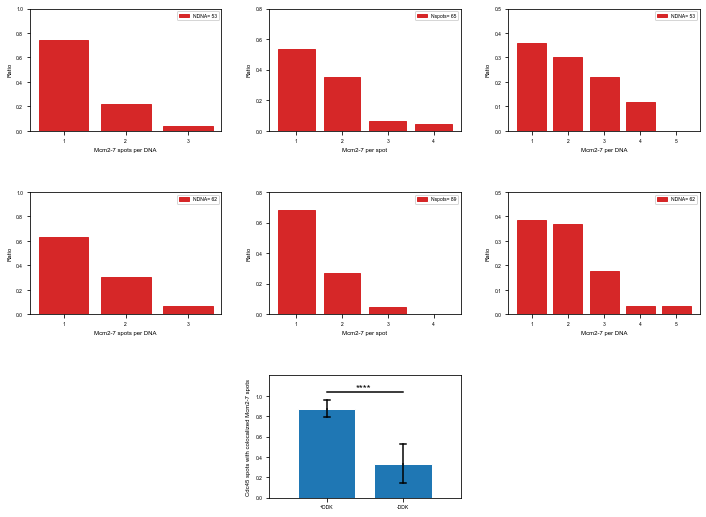

In [2]:
# Figure S2

facecolor='tab:red'
edgecolor='tab:red'

fig = plt.figure(figsize=(12, 9))
gs = matplotlib.gridspec.GridSpec(3, 3, wspace=0.25, hspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 1])


# Plot % colocalization + and - DDK and plot traces in their respective color

N_total_r_spots_DDK=[]
N_colocalized_r_spots_DDK=[]

N_total_r_spots_NO_DDK=[]
N_colocalized_r_spots_NO_DDK=[]

N_total_g_spots_DDK=[]
N_colocalized_g_spots_DDK=[]

N_total_g_spots_NO_DDK=[]
N_colocalized_g_spots_NO_DDK=[]

red_spots_x0_DDK=[]
red_spots_x0_NO_DDK=[]

green_spots_x0_DDK=[]
green_spots_x0_NO_DDK=[]

coloc_green_spots_x0_DDK=[]
coloc_green_spots_x0_NO_DDK=[]


# Get data DDK data set

r_spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
g_spots_per_DNA= []

r_stoichiometries=[] # list of all stoichiometries of all red spots
g_stoichiometries=[]

for scan_id, df_scan in df_DDK_filtered.groupby('scan_id'):
    r_spots_this_DNA=[]
    g_spots_this_DNA=[]
    r_stoichiometries_this_DNA=[]
    g_stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_if, df_track in df_trace.groupby('track_id'):
            if df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['step_count'].iloc[0]>0 and df_track['color_str'].iloc[0]=='g':    
                    g_spots_this_DNA.append(1)
                    g_stoich_this_spot=[df_track['step_count'].iloc[0]]
                    g_stoichiometries_this_DNA.extend(g_stoich_this_spot)
                    g_stoichiometries.extend(g_stoich_this_spot)
                if df_track['step_count'].iloc[0]>0 and df_track['color_str'].iloc[0]=='r':
                    r_spots_this_DNA.append(1)
                    r_stoich_this_spot=[df_trace['step_count'].iloc[0]]
                    r_stoichiometries_this_DNA.extend(r_stoich_this_spot)
                    r_stoichiometries.extend(r_stoich_this_spot)         
    g_total_spots_DNA=np.sum(g_spots_this_DNA)
    g_sum_stoichs_this_DNA=np.sum(g_stoichiometries_this_DNA)
    g_spots_per_DNA.append((g_total_spots_DNA, g_sum_stoichs_this_DNA))           
    r_total_spots_DNA=np.sum(r_spots_this_DNA)
    r_sum_stoichs_this_DNA=np.sum(r_stoichiometries_this_DNA)
    r_spots_per_DNA.append((r_total_spots_DNA, r_sum_stoichs_this_DNA))
    

    
# panel b

r_spots_per_DNA_array = np.array([tup[0] for tup in r_spots_per_DNA])
r_labels, r_counts = np.unique(r_spots_per_DNA_array[r_spots_per_DNA_array>0], return_counts=True)

ax1.bar(r_labels, r_counts/len(r_spots_per_DNA_array[r_spots_per_DNA_array>0]), edgecolor='tab:red', facecolor='tab:red')
ax1.set_xlabel('Mcm2-7 spots per DNA', size=6)
ax1.set_ylabel('Ratio', size=6)
ax1.legend(['NDNA= '+str(len(r_spots_per_DNA_array))], loc='upper right', fontsize=5)
ax1.set_xticks(np.arange(1, max(r_spots_per_DNA_array)+1, 1))
ax1.set_ylim([0,1])
ax1.set_yticks(np.arange(0, 1.1, 0.2))

# panel c

#Convert stoichiometries to string
r_str_stoichiometries=[]
for stoichiometry in r_stoichiometries:
    r_str_stoichiometries.append(str(int(stoichiometry)))

r_labels, counts = np.unique(r_str_stoichiometries, return_counts=True)
ax2.bar(r_labels, counts/len(r_str_stoichiometries),edgecolor='tab:red', facecolor='tab:red')
ax2.set_xlabel('Mcm2-7 per spot', size=6)
ax2.set_ylabel('Ratio', size=6)
ax2.legend(['Nspots= '+str(len(r_str_stoichiometries))], loc='upper right', fontsize=5)
ax2.set_ylim([0,0.8])
ax2.set_yticks(np.arange(0, 1, 0.2))


# panel d

#Convert fluorophores per DNA to string
fluorophores_per_DNA_array = np.array([tup[1] for tup in r_spots_per_DNA])
str_fluorophores=[]
for fluorophores in fluorophores_per_DNA_array:
    if fluorophores>0:
        str_fluorophores.append(str(int(fluorophores))) 
    
labels, counts = np.unique(str_fluorophores, return_counts=True)
ax3.bar(labels, counts/len(str_fluorophores),edgecolor='tab:red', facecolor='tab:red')
ax3.set_xlabel('Mcm2-7 per DNA', size=6)
ax3.set_ylabel('Ratio', size=6)
ax3.legend(['NDNA= '+str(len(fluorophores_per_DNA_array))], loc='upper right', fontsize=5)
ax3.bar('5',0) # Added to make axis the same as pannel g
ax3.set_ylim([0,0.5])
ax3.set_yticks(np.arange(0, 0.6, 0.1))



# Get data NO DDK data set

r_spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
g_spots_per_DNA= []

r_stoichiometries=[] # list of all stoichiometries of all red spots
g_stoichiometries=[]

for scan_id, df_scan in df_NO_DDK_filtered.groupby('scan_id'):
    r_spots_this_DNA=[]
    g_spots_this_DNA=[]
    r_stoichiometries_this_DNA=[]
    g_stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_if, df_track in df_trace.groupby('track_id'):
            if df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['step_count'].iloc[0]>0 and df_track['color_str'].iloc[0]=='g':    
                    g_spots_this_DNA.append(1)
                    g_stoich_this_spot=[df_track['step_count'].iloc[0]]
                    g_stoichiometries_this_DNA.extend(g_stoich_this_spot)
                    g_stoichiometries.extend(g_stoich_this_spot)
                if df_track['step_count'].iloc[0]>0 and df_track['color_str'].iloc[0]=='r':
                    r_spots_this_DNA.append(1)
                    r_stoich_this_spot=[df_trace['step_count'].iloc[0]]
                    r_stoichiometries_this_DNA.extend(r_stoich_this_spot)
                    r_stoichiometries.extend(r_stoich_this_spot)         
    g_total_spots_DNA=np.sum(g_spots_this_DNA)
    g_sum_stoichs_this_DNA=np.sum(g_stoichiometries_this_DNA)
    g_spots_per_DNA.append((g_total_spots_DNA, g_sum_stoichs_this_DNA))           
    r_total_spots_DNA=np.sum(r_spots_this_DNA)
    r_sum_stoichs_this_DNA=np.sum(r_stoichiometries_this_DNA)
    r_spots_per_DNA.append((r_total_spots_DNA, r_sum_stoichs_this_DNA))



# panel e

r_spots_per_DNA_array = np.array([tup[0] for tup in r_spots_per_DNA])
r_labels, r_counts = np.unique(r_spots_per_DNA_array[r_spots_per_DNA_array>0], return_counts=True)

ax4.bar(r_labels, r_counts/len(r_spots_per_DNA_array[r_spots_per_DNA_array>0]), edgecolor='tab:red', facecolor='tab:red')
ax4.set_xlabel('Mcm2-7 spots per DNA', size=6)
ax4.set_ylabel('Ratio', size=6)
ax4.legend(['NDNA= '+str(len(r_spots_per_DNA_array))], loc='upper right', fontsize=5)
ax4.set_xticks(np.arange(1, max(r_spots_per_DNA_array)+1, 1))
ax4.set_ylim([0,1])
ax4.set_yticks(np.arange(0, 1.1, 0.2))

# panel f

#Convert stoichiometries to string
r_str_stoichiometries=[]
for stoichiometry in r_stoichiometries:
    r_str_stoichiometries.append(str(int(stoichiometry)))

r_labels, counts = np.unique(r_str_stoichiometries, return_counts=True)
ax5.bar(r_labels, counts/len(r_str_stoichiometries),edgecolor='tab:red', facecolor='tab:red')
ax5.set_xlabel('Mcm2-7 per spot', size=6)
ax5.set_ylabel('Ratio', size=6)
ax5.legend(['Nspots= '+str(len(r_str_stoichiometries))], loc='upper right', fontsize=5)
ax5.set_ylim([0,0.8])
ax5.bar('4',0) # Added to make axis the same as pannel c
ax5.set_yticks(np.arange(0, 1, 0.2))


# panel g

#Convert fluorophores per DNA to string
fluorophores_per_DNA_array = np.array([tup[1] for tup in r_spots_per_DNA])
str_fluorophores=[]
for fluorophores in fluorophores_per_DNA_array:
    if fluorophores>0:
        str_fluorophores.append(str(int(fluorophores))) 
    
labels, counts = np.unique(str_fluorophores, return_counts=True)
ax6.bar(labels, counts/len(str_fluorophores),edgecolor='tab:red', facecolor='tab:red')
ax6.set_xlabel('Mcm2-7 per DNA', size=6)
ax6.set_ylabel('Ratio', size=6)
ax6.legend(['NDNA= '+str(len(fluorophores_per_DNA_array))], loc='upper right', fontsize=5)
ax6.bar('5',0) # Added to make axis the same as pannel g
ax6.set_ylim([0,0.5])
ax6.set_yticks(np.arange(0, 0.6, 0.1))



# panel h

# Plot % colocalization + and - DDK and plot traces in their respective color

N_total_r_spots_DDK=[]
N_colocalized_r_spots_DDK=[]

N_total_r_spots_NO_DDK=[]
N_colocalized_r_spots_NO_DDK=[]

N_total_g_spots_DDK=[]
N_colocalized_g_spots_DDK=[]

N_total_g_spots_NO_DDK=[]
N_colocalized_g_spots_NO_DDK=[]

red_spots_x0_DDK=[]
red_spots_x0_NO_DDK=[]

green_spots_x0_DDK=[]
green_spots_x0_NO_DDK=[]

coloc_green_spots_x0_DDK=[]
coloc_green_spots_x0_NO_DDK=[]

for scan_id, df_scan in df_DDK_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_id, df_track in df_trace.groupby('track_id'):
            if df_track['step_count'].iloc[0]>0 and df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['color_str'].iloc[0]=='r':
                    N_total_r_spots_DDK.append(1)
                    init_loc_r = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    red_spots_x0_DDK.append(init_loc_r)
                    #plt.plot(df_track['time_s'], df_track['x_kbp'], color="red")
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_r_spots_DDK.append(1)
                if df_track['color_str'].iloc[0]=='g':
                    N_total_g_spots_DDK.append(1)
                    init_loc_g = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    green_spots_x0_DDK.append(init_loc_g)
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_g_spots_DDK.append(1)
                        coloc_green_spots_x0_DDK.append(init_loc_g)
                 
            
for scan_id, df_scan in df_NO_DDK_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_id, df_track in df_trace.groupby('track_id'):
            if df_track['step_count'].iloc[0]>0 and df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['color_str'].iloc[0]=='r':
                    N_total_r_spots_NO_DDK.append(1) 
                    init_loc_r = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    red_spots_x0_NO_DDK.append(init_loc_r) 
                    #plt.plot(df_track['time_s'], df_track['x_kbp'], color="red")
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_r_spots_NO_DDK.append(1)
                if df_track['color_str'].iloc[0]=='g':
                    N_total_g_spots_NO_DDK.append(1)
                    init_loc_g = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    green_spots_x0_NO_DDK.append(init_loc_g)
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_g_spots_NO_DDK.append(1)
                        coloc_green_spots_x0_NO_DDK.append(init_loc_g)

N_total_r_spots_DDK_np= np.array(N_total_r_spots_DDK)            
N_colocalized_r_spots_DDK_np= np.array(N_colocalized_r_spots_DDK)

N_total_r_spots_NO_DDK_np= np.array(N_total_r_spots_NO_DDK)
N_colocalized_r_spots_NO_DDK_np= np.array(N_colocalized_r_spots_NO_DDK)

initial_locs_red_DDK_np= np.array(red_spots_x0_DDK)
initial_locs_red_NO_DDK_np= np.array(red_spots_x0_NO_DDK)

locs_from_center_r_DDK= abs(initial_locs_red_DDK_np-(DNA_len_kbp/2))
locs_from_center_r_NO_DDK= abs(initial_locs_red_NO_DDK_np-(DNA_len_kbp/2))


N_total_g_spots_DDK_np= np.array(N_total_g_spots_DDK)            
N_colocalized_g_spots_DDK_np= np.array(N_colocalized_g_spots_DDK)

N_total_g_spots_NO_DDK_np= np.array(N_total_g_spots_NO_DDK)
N_colocalized_g_spots_NO_DDK_np= np.array(N_colocalized_g_spots_NO_DDK)

initial_locs_green_DDK_np= np.array(green_spots_x0_DDK)
initial_locs_green_NO_DDK_np= np.array(green_spots_x0_NO_DDK)

locs_from_center_g_DDK= abs(initial_locs_green_DDK_np-(DNA_len_kbp/2))
locs_from_center_g_NO_DDK= abs(initial_locs_green_NO_DDK_np-(DNA_len_kbp/2))

initial_locs_coloc_green_DDK_np= np.array(coloc_green_spots_x0_DDK)
initial_locs_coloc_green_NO_DDK_np= np.array(coloc_green_spots_x0_NO_DDK)

locs_from_center_coloc_g_DDK= abs(initial_locs_coloc_green_DDK_np-(DNA_len_kbp/2))
locs_from_center_coloc_g_NO_DDK= abs(initial_locs_coloc_green_NO_DDK_np-(DNA_len_kbp/2))


# Perform binomial test

p_val=stats.binom_test(len(N_colocalized_g_spots_DDK_np), n=len(N_total_g_spots_DDK_np), p=(len(N_colocalized_g_spots_NO_DDK_np) / len(N_total_g_spots_NO_DDK_np)), alternative='two-sided')
print(p_val)

# Plot colocalized MCM/total MCM ratios.

bars_DDK = [len(N_colocalized_g_spots_DDK_np) / len(N_total_g_spots_DDK_np)]
bars_NO_DDK = [len(N_colocalized_g_spots_NO_DDK_np) / len(N_total_g_spots_NO_DDK_np)]

x_DDK = [0.05]
x_NO_DDK = [0.25]


#fig = plt.figure(figsize=(12, 9))
gs = matplotlib.gridspec.GridSpec(3, 3, wspace=0.25, hspace=0.5)

ax7.bar(x_DDK, bars_DDK, width=0.15, edgecolor='white', facecolor='tab:blue')
ax7.set_xticks([0.05, 0.25])
ax7.set_xticklabels(['+DDK', '-DDK'])
ax7.set_ylim(0, 1.2)
ax7.set_xlim(-0.1, 0.4)
ax7.set_ylabel('Cdc45 spots with colocalized Mcm2-7 spots', fontsize=6)
ax7.set_yticks(np.arange(0, 1.2, 0.2))
ax7.bar(x_NO_DDK, bars_NO_DDK, width=0.15,edgecolor='white', facecolor='tab:blue')

# computing standard error of proportion

error_DDK=np.sqrt(((bars_DDK[0]*(1-bars_DDK[0])))/len(N_total_g_spots_DDK_np))
error_NO_DDK=np.sqrt(((bars_NO_DDK[0])*(1-bars_NO_DDK[0]))/len(N_total_g_spots_NO_DDK_np))

# add error bars

coord_y = bars_DDK[0]+0.15
ax7.plot([x_DDK[0], x_DDK[0]], [bars_DDK[0], bars_DDK[0]+error_DDK], '-', color='black')
ax7.plot([x_DDK[0]-0.008, x_DDK[0]+0.008], [bars_DDK[0]+error_DDK, bars_DDK[0]+error_DDK], '-', color='black')

ax7.plot([x_DDK[0], x_DDK[0]], [bars_DDK[0], bars_DDK[0]-error_DDK], '-', color='black')
ax7.plot([x_DDK[0]-0.008, x_DDK[0]+0.008], [bars_DDK[0]-error_DDK, bars_DDK[0]-error_DDK], '-', color='black')


ax7.plot([x_NO_DDK, x_NO_DDK], [bars_NO_DDK[0], bars_NO_DDK[0]+error_NO_DDK], '-', color='black')
ax7.plot([x_NO_DDK[0]-0.008, x_NO_DDK[0]+0.008], [bars_NO_DDK[0]+error_NO_DDK, bars_NO_DDK[0]+error_NO_DDK], '-', color='black')

ax7.plot([x_NO_DDK, x_NO_DDK], [bars_NO_DDK[0], bars_NO_DDK[0]-error_NO_DDK], '-', color='black')
ax7.plot([x_NO_DDK[0]-0.008, x_NO_DDK[0]+0.008], [bars_NO_DDK[0]-error_NO_DDK, bars_NO_DDK[0]-error_NO_DDK], '-', color='black')


# Add statistical significance
ax7.plot([x_DDK, x_NO_DDK], [coord_y+0.015, coord_y+0.015], '-', color='black')
ax7.text((x_DDK[0]+x_NO_DDK[0])/2-0.025,bars_DDK[0]+0.18,'****', fontsize=10)


# Finish up and save.
ax1.tick_params(axis='x', labelsize=5)
ax2.tick_params(axis='x', labelsize=5)
ax3.tick_params(axis='x', labelsize=5)
ax4.tick_params(axis='x', labelsize=5)
ax5.tick_params(axis='x', labelsize=5)
ax6.tick_params(axis='x', labelsize=5)
ax7.tick_params(axis='x', labelsize=5)

ax1.tick_params(axis='y', labelsize=5)
ax2.tick_params(axis='y', labelsize=5)
ax3.tick_params(axis='y', labelsize=5)
ax4.tick_params(axis='y', labelsize=5)
ax5.tick_params(axis='y', labelsize=5)
ax6.tick_params(axis='y', labelsize=5)
ax7.tick_params(axis='y', labelsize=5)


plt.tight_layout()
# plt.savefig('S2.PDF', dpi=600)
plt.show()
plt.close()



In [3]:
len(N_total_g_spots_DDK_np)

16

In [4]:
len(N_total_g_spots_NO_DDK_np)

6